# LLVM: A Compilation Framework for Lifelong Program Analysis & Transformation

This paper describes **LLVM (Low Level Virtual Machine), a compiler framework** designed to support transparent, lifelong program analysis and transformation for arbitrary programs, by **providing high-level information to compiler transformations** at compile-time, link-time, run-time, and in idle time between runs.

It is a language-independent type-system that exposes the primitives commonly used to implement high-level language features.

We describe the design of the

- LLVM representation
- Compiler framework

and evaluate the design in three ways:

- the size and effectiveness of the representation, including the type information it provides
- compiler performance for several interprocedural problems
- illustrative examples of the benefits LLVM provides for several challenging compiler problems.

Optimizations:

- install time (machine-dependent)
- run-time (dynamic optimization)
- profile-guided (between runs)
- link-time (??)

LLVM is a compiler framework that aims to make lifelong program analysis and transformation available for arbitrary software, and in a manner that is transparent to programmers.

- code representation (with several novel features that serves as a common representation for analysis, transformation, and code distribution)
- compiler design (that exploits this representation to provide a combination of capabilities)

LLVM describes a program using an abstract RISC-like instruction.

- type information
- explicit control flow graphs
- explicit dataflow representation

Novel features:

- low-level, language-independent type system that can be used to implement data types and ops. Algoirthms for pointer analysis, dependence analysis, data transformations.
- instructions for performing type conversions, low-level address arithmetic
- two low-level exception-handling instructions for exceptions

source-language-independent

- low-level instruction set and memory model that are only slightly richer than standard assembly languages, and the type system does not prevent representing code with little type information

- does not impose any particular runtime requirements or semantics on programs

LLVM does not represent high-level language features directly (so it cannot be used for some language- dependent transformations), nor does it capture machine- dependent features or code sequences used by back-end code generators (it must be lowered to do so).

LLVM is complementary to high-level virtual machines (not an alternative):

- no notion of high-level constructs such as classes, inheritance, exceptions
- no runtime system for a particular language, can be used to implement high-level virtual machines
- no type safety, memory safety, or language interoperability

The LLVM compiler framework exploits the code representation to provide a combination of five capabilities:

- **Persistent program information**: *The compilation model preserves the LLVM representation throughout an application’s lifetime*, allowing sophisticated optimizations to be performed at all stages, including runtime and idle time between runs.
- **Offline code generation**: Despite the last point, it is possible to compile programs into efficient native machine code offline, using expensive code generation techniques not suitable for runtime code generation. This is crucial for performance-critical programs.

- **User-based profiling and optimization**: The LLVM framework gathers profiling information at run-time in the field so that it is representative of actual users, and can apply it for profile-guided transformations both at run-time and in idle time.

- **Transparent runtime model**: The system does not specify any particular **object model, exception semantics, or runtime environment**, thus allowing any language (or combination of languages) to be compiled using it.

- **Uniform, whole-program compilation**: Language-independence makes it possible to optimize and compile all code comprising an application in a uniform manner (after linking), including language-specific runtime libraries and system libraries.


**Effectiveness of the LLVM system with respect to three issues**:

- the size and effectiveness of the representation, including the ability to extract useful type information for C programs
- the compiler performance (not the performance of generated code which depends on the particular code generator or optimization sequences used)
- examples illustrating the key capabilities LLVM provides for several challenging compiler problems

Code size measurements show that the LLVM representation is comparable in size to X86 machine code (a CISC architecture) and roughly 25% smaller than RISC code on average, despite capturing much richer type information as well as an infinite register set in SSA form.

Section 2 describes the LLVM code representation.

Section 3 then describes the design of the LLVM compiler framework.

Section 4 discusses our evaluation of the LLVM system as described above.

Section 5 compares LLVM with related previous systems.

Section 6 concludes with a summary of the paper.

# Program representation (LLVM code representation)

The code representation is one of the key factors that differentiates LLVM from other systems.

Section gives an overview of **LLVM instruction set**

Describes:

- the language-independent type system
- the memory model
- exception handling mechanisms,
- the offline, in-memory representations

In compiler design, **static single assignment** form (often abbreviated as SSA form or simply SSA) is a property of an intermediate representation (IR) that requires each variable to be assigned exactly once and defined before it is used. Existing variables in the original IR are split into versions, new variables typically indicated by the original name with a subscript in textbooks, so that every definition gets its own version. In SSA form, use-def chains are explicit and each contains a single element.



### Overview of the LLVM Instruction Set

The LLVM instruction set captures the key operations of ordinary processors but avoids machine-specific constraints such as physical registers, pipelines, and low-level calling conventions.

LLVM provides an infinite set of typed virtual registers which can hold values of primitive types (Boolean, integer, floating point, and pointer).

LLVM is a load/store architecture: programs transfer values between registers and memory solely via load and store op- erations using typed pointers.


The entire LLVM instruction set consists of only 31 op-codes
- avoid multiple op- codes for the same operations
- most opcodes in LLVM are overloaded

For example, there are no unary operators: not and neg are implemented in terms of xor and sub, respectively.

Most instructions, including all arithmetic and logical operations, are in three-address form: they take one or two operands and produce a single result.

### Language-independent Type Information, Cast, and GetElementPtr

One of the fundamental design features of LLVM is the inclusion of a language-independent type system.

The LLVM type system includes source-language-independent primitive types with predefined sizes (void, bool, signed/unsigned integers from 8 to 64 bits, and single- and double-precision floating-point types)

LLVM also includes (only) four derived types: *pointers, arrays, structures, and functions.*

Because LLVM is language independent and must support weakly-typed languages, declared type information in a legal LLVM program may not be reliable.
Instead, some pointer analysis algorithm must be used to distinguish memory accesses for which the type of the pointer target is reliably known from those for which it is not.

The LLVM ‘cast’ instruction is used to convert a value of one type to another arbitrary type, and is the only way to perform such conversions.

### Explicit Memory Allocation and Unified Memory Model

LLVM provides instructions for typed memory allocation. The malloc instruction allocates one or more elements of a specific type on the heap, returning a typed pointer to the new memory. 
- malloc (heap)
- alloca (stack). memory is freed after return automatically

### 2.4 Function Calls and Exception Handling

- Function calls
For ordinary function calls, LLVM provides a call instruction that takes a typed function pointer (which may be a function name or an actual pointer value) and typed actual arguments.

- Exception handling

### Plain-text, Binary, and In-memory Representations

The LLVM representation is a first class language which defines equivalent textual, binary, and in-memory (i.e., compiler’s internal) representations. The instruction set is designed to serve effectively both as a persistent, offline code representation and as a compiler internal representation, with no semantic conversions needed between the two.



# 3. COMPILER ARCHITECTURE

The goal of the LLVM compiler framework is to enable
sophisticated transformations at link-time, install-time, run-time, and idle-time, by operating on the LLVM representation of a program at all stages.

*In contrast, typical JVM implementations convert from the stack-based bytecode language used oﬄine to an appropriate representation for compiler transformations, and some even convert to SSA form for this purpose.*

### High-Level Design of the LLVM Compiler Framework

Static compiler front-ends emit code in the
LLVM representation -> which is combined together by the LLVM linker. 

**The linker** performs a variety of link-time op-
timizations, especially interprocedural ones.

The resulting LLVM code is then translated to native code for a given target at link-time or install-time, and the LLVM code is saved with the native code. (It is also possible to translate LLVM
code at runtime with a just-in-time translator.)

The native code generator inserts light-weight instrumentation to detect frequently executed code regions (currently loop nests and traces, but potentially also functions), and these can be optimized at runtime. The proﬁle data collected at runtime represent the end-user’s (not the developer’s) runs, and can be used by an oﬄine optimizer to perform aggressive proﬁle-driven optimizations in the ﬁeld during idle-time, tailored to the speciﬁc target machine.

This strategy provides ﬁve beneﬁts that are not available in the traditional model of static compilation to native machine code.

1. persistent program information,
2. oﬄine code generation,
3. user-based proﬁling and optimization,
4. transparent runtime model, and
5. uniform, whole-program compilation.

These are diﬃcult to obtain simultaneously for at least two reasons. First, oﬄine code generation (#2) normally does not allow optimization at later stages on the higher-level representation instead of native machine code (#1 and #3). Second, lifelong compilation has traditionally been associated only with bytecode-based languages, which do not provide #4 and often not #2 or #5.

- **Traditional source-level compilers** provide #2 and #4, but do not attempt #1, #3 or #5. They do provide interprocedural optimization, but require signiﬁcant changes to application Makeﬁles.

- Several **commercial compilers** provide the additional beneﬁt of #1 and #5 at link-time by exporting their intermediate representation to object ﬁles [21, 5, 26] and performing optimizations at link-time. No such system we know of is also capable of preserving its representation for runtime or idle-time use (beneﬁts #1 and #3).

- **Higher-level virtual machines like JVM and CLI** provide beneﬁt #3 and partially provide #1 (in particular, they focus on runtime optimization, because the need for bytecode veriﬁcation greatly restricts the optimizations that may be done before runtime [3]). CLI partially provides #5 because it can support code in multiple languages, but any low-level system code and code in non-conforming languages is executed as “unmanaged code”. These systems do not provide #2 with #1 or #3 because runtime optimization is generally only possible when using JIT code generation

- **Transparent binary runtime optimization systems** like Dynamo and the runtime optimizers in Transmeta processors provide ...

- **Proﬁle Guided Optimization** for static languages provide beneﬁt #3 at the cost of not being transparent they require a multi-phase compilation process

Additionally, PGO suﬀers from three problems:

(1) Empirically, developers are unlikely to use PGO, except
when compiling benchmarks.

(2) When PGO is used,
the application is tuned to the behavior of the training run. If the training run is not representative of the end-user’s usage patterns, performance may not improve and may even be hurt by the proﬁle-driven optimization.

(3) The proﬁling information is completely
static, meaning that the compiler cannot make use of
phase behavior in the program or adapt to changing
usage patterns.

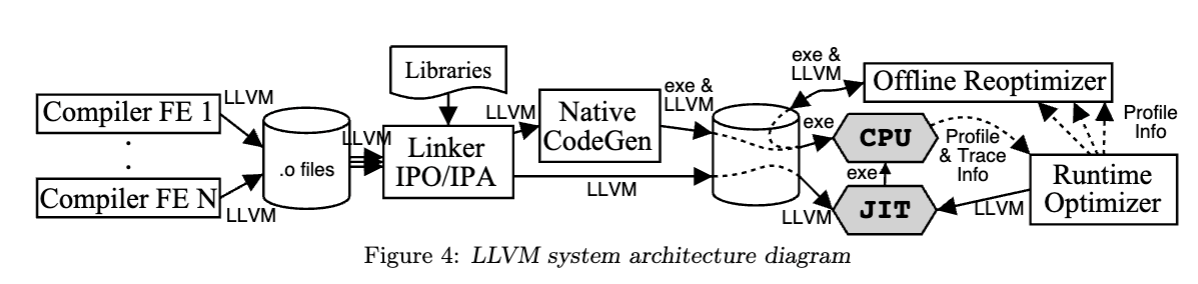


There are also signiﬁcant limitations of the LLVM strategy.

First, language-speciﬁc optimizations must be performed in the front-end before generating LLVM code. LLVM is not designed to represent source languages types or features directly.

Second, it is an open question whether languages requiring sophisticated runtime systems such as Java can beneﬁt directly from LLVM. We are currently exploring the potential beneﬁts of implementing higher-level virtual machines such as JVM or CLI on top of LLVM.

The subsections below describe the key components of the LLVM compiler architecture, emphasizing design and implementation features that make the capabilities above practical and eﬃcient

### Compile-Time: External front-end & static optimizer

External static LLVM compilers (referred to as front-ends) translate source-language programs into the LLVM virtual instruction set. Each static compiler can perform three key tasks, of which the ﬁrst and third are optional:

- Perform language-speciﬁc optimizations, e.g., optimizing closures in languages with higher-order functions.
- Translate source programs to LLVM code, synthesizing as much useful LLVM type information as possible, especially to expose pointers, structures, and arrays.
- Invoke LLVM passes for global or interprocedural optimizations at the module level. The LLVM optimizations are built into libraries, making it easy for front-ends to use them.


The front-end does not have to perform SSA construction.


Note that many “high-level” optimizations are not really language-dependent, and are often special cases of more general optimizations that may be performed on LLVM code. For example, both virtual function resolution for object-oriented languages (described in Section 4.1.2) and tail-recursion elimination which is crucial for functional languages can be done in LLVM.

### Linker & Interprocedural Optimizer

Link time is the ﬁrst phase of the compilation process
where most of the program is available for analysis and transformation. As such, link-time is a natural place to perform aggressive interprocedural optimizations across the entire program. The link-time optimizations in LLVM oper- ate on the LLVM representation directly, taking advantage of the semantic information it contains. LLVM currently includes a number of interprocedural analyse ... 

Context-sensitive points-to analysis (Data Structure Analysis [31]), call graph construction, and Mod/Ref analysis, and interprocedural transformations like inlining, deaglobal elimination, dead argument elimination, dead type limination, constant propagation, array bounds check elimination [28], simple structure ﬁeld reordering and Automatic Pool Allocation.

The design of the compile- and link-time optimizers in LLVM permit the use of a well-known technique for speeding up interprocedural analysis. At compile-time, **interprocedural summaries can be computed for each function** in the program and attached to the LLVM bytecode. The link time interprocedural optimizer can then process these **interprocedural summaries as input instead of having to compute results from scratch**. This technique can dramatically speed up incremental compilation when a small number of translation units are modiﬁed [7]. Note that this is achieved without building a program database or deferring the compilation of the input source code until link-time.

### Ofﬂine or JIT Native Code Generation
Before execution, a code generator is used to translate from LLVM to native code for the target platform (we currently support the Sparc V9 and x86 architectures), in one of two ways.

- The ﬁrst option, the code generator is run statically at link time or install time, to generate high performance native code for the application, using possibly expensive code generation techniques. If the user decides to use the post-link (runtime and oﬄine) optimizers, a copy of the LLVM bytecode for the program is included into the executable itself. In addition, the code generator inserts light-weight instrumentation into the program to identify frequently executed regions of code.

- Alternatively, a just-in-time Execution Engine can be used which invokes the appropriate code generator at runtime, translating one function at a time for execution (or uses the portable LLVM interpreter if no native code generator is available). The JIT translator can also insert the same instrumentation as the oﬄine code generator.

### Runtime Path Proﬁling & Reoptimization

One of the goals of the LLVM project is to develop a new strategy for runtime optimization of ordinary applications. As a program executes, the most frequently executed execution paths are identiﬁed through a combination of ofﬂine and online instrumentation [39].

The oﬄine instrumentation (inserted by the native code generator) identiﬁes frequently executed loop regions in the code. When a hot loop region is detected at runtime, a runtime instrumentation library instruments the executing native code to identify frequently-executed paths within that region. Once hot paths are identiﬁed, we duplicate the original LLVM code into a trace, perform LLVM optimizations on it, and then regenerate native code into a software-managed trace cache. We then insert branches between the original code and the new native code.

The strategy described here is powerful because it combines the following three characteristics:

(a) Native code generation can be performed ahead-of-time using sophisticated algorithms to generate high-performance code.

(b) The native code generator and the runtime optimizer can work together since they are both part of the LLVM framework, allowing the runtime optimizer to exploit support from the code generator (e.g., for instrumentation and simplifying transformations).

(c) The runtime optimizer can use high-level information from the LLVM representation to perform sophisticated runtime optimizations.

- high-quality initial code generation (oﬄine rather than online),
- cooperative support from the code-generator,
- and the ability to perform sophisticated analyses and optimizations (using LLVM rather than native code as the input)

### Ofﬂine Reoptimization with End-user Proﬁle Information
 Because the LLVM representation is preserved perma- nently, it enables transparent oﬄine optimization of applications during idle-time on an end-user’s system. Such an optimizer is simply a modiﬁed version of the link-time interprocedural optimizer, but with a greater emphasis on proﬁle-driven and target-speciﬁc optimizations. An oﬄine, idle-time reoptimizer has several key beneﬁts.
 
 First, as noted earlier, unlike traditional proﬁle-guided optimizers (i.e., compile-time or link-time ones), it can use proﬁle information gathered from end-user runs of the application. It can even reoptimize an application multiple times in response to changing usage patterns over time (or optimize differently for users with diﬀering patterns).
 
 Second, it can tailor the code to detailed features of a single target machine, whereas traditional binary distributions of code must often be run on many diﬀerent machine conﬁgurations with compatible architectures and operating systems. Third, unlike the runtime optimizer (which has both the previous beneﬁts), it can perform much more aggressive optimizations because it is run oﬄine.
 
 Nevertheless, runtime optimization can further improve performance because of the ability to perform optimizations based on runtime values as well as path-sensitive optimizations (which can cause signiﬁcant code growth if done aggressively oﬄine), and to adaptively optimize code for changing execution behavior within a run. For dynamic, long-running applications, therefore, the runtime and oﬄine reoptimizers could coordinate to ensure the highest achievable performance.

# APPLICATIONS AND EXPERIENCES

Evaluation of this design in terms of three categories of issues:

(a) the characteristics of the representation;

(b) the speed of
performing whole-program analyses and transformations in the compiler; and

(c) illustrative uses of the LLVM system
for challenging compiler problems, focusing on how the novel capabilities in LLVM beneﬁt these uses.

### Representation Issues

First, a key aspect of the representation is
the **language-independent type system**.

Does this type system provide any useful information when it can be violated with casts?

Second, how do high-level language features
map onto the LLVM type system and code representation?

Third, how large is the LLVM representation when written to disk?

##### What value does type information provide?

Aggressive optimizations: *Reordering two ﬁelds of a structure or optimizing memory management [12, 30].*

LVM includes a ﬂow-insensitive, ﬁeld-sensitive and context-sensitive points-to analysis called Data Structure Analysis (DSA) [31]. 

Overall, despite the use of custom allocators, casting to and from void*, and other C tricks, DSA is still able to verify the type information for an average of 68% of accesses across these programs.

Intuitively, checking that declared types are respected is much easier than inferring those types, for structure and array types in a low-level code representation.


##### How do high-level features map onto LLVM?

Compared to source languages, LLVM is a much lower level representation. Even C, which itself is quite low-level, has many features which must be lowered by a compiler targeting LLVM.

In order for the representation to support eﬀective analyses and transformations, the mapping from source- language features to LLVM should capture the high-level operational behavior as cleanly as possible.

All the complex, high-level features of C++ are expressed clearly in LLVM, allowing their behavior to be eﬀectively analyzed and optimized:

- Implicit calls 
- Templates
- Base classes are expanded into nested structure types.
- Avirtual function table is represented as a global, constant array of typed function pointers
- C++ exceptions (invoke and unwind)

We believe that similarly clean LLVM implementations exist for most constructs in other language families like Scheme, the ML family, SmallTalk, Java and Microsoft CLI.

##### How compact is the LLVM representation?
Since code for the compiled program is stored in the LLVM representation throughout its lifetime, it is important that it not be too large. 

The ﬁgure shows that LLVM code is about the same size as native X86 executables (a denser, variable-size instruction set), and signiﬁcantly smaller than SPARC (a traditional 32-bit instruction RISC machine).

##### How fast is LLVM?

The table includes numbers for several transformations: **DGE** (aggressive Dead Global variable and function Elimination), **DAE** (aggressive Dead Argument and return value Elimination), and **inline** (a function integration pass). All these interprocedural optimizations work on the whole program at link-time. 



### Applications using life-time analysis and optimization capabilities of LLVM

Finally, to illustrate the capabilities provided by the compiler framework, we brieﬂy describe three examples of how LLVM has been used for widely varying compiler problems, emphasizing some of the novel capabilities described in the introduction

##### Projects using LLVM as a general compiler infrastructure

As noted earlier, we have implemented several compiler techniques in LLVM. The most aggressive of these are Data Structure Analysis (DSA) and Automatic Pool Allocation [30], which analyze and transform programs in terms of their logical data structures. These techniques inherit a few signiﬁcant beneﬁts from LLVM, especially,

(a) these techniques are only eﬀective if most of the program is available, i.e., at link-time;

(b) type information is crucial for their effectiveness, especially pointers and structures;

(c) the techniques are source-language independent; and

(d) SSA signiﬁcantly improves the precision of DSA, which is ﬂowinsensitive.

##### SAFECode: A safe low-level representation and execution environment

The SAFECode system exploits nearly all capabilities of the LLVM framework, except runtime optimization. It directly uses the LLVM code representation, which provides the ability to analyze C and C++ programs, which is crucial for supporting embedded software, middle-ware, and system libraries. SAFECode relies on the type information in LLVM (with no syntactic changes) to check and enforce type safety. It relies on the array type information in LLVM to enforce array bounds safety, and uses interprocedural anal- ysis to eliminate runtime bounds checks in many cases [28]. It uses interprocedural safety checking techniques, exploit- ing the link-time framework to retain the beneﬁts of separate compilation (a key diﬃculty that led previous such systems to avoid using interprocedural techniques [17, 23]).

##### External ISA design for Virtual Instruction Set Computers

**Virtual Instruction Set Computers** [40, 16, 2] are processor designs that use two distinct instruction sets: an externally visible, virtual instruction set (V-ISA) which serves as the program representation for all software, and a hidden implementation-speciﬁc instruction set (I-ISA) that is the actual hardware ISA.

The fundamental beneﬁt of LLVM for this work is that the LLVM code representation is low-level enough to represent arbitrary external software (including operating system code), yet provides rich enough information to support sophisticated compiler techniques in the translator. 

# RELATED WORK

We focus on comparing LLVM with three classes of previous work:

- other virtual-machine-based compiler systems
- research on typed assembly languages
- link-time or dynamic optimization systems

As noted in the introduction, the goals of LLVM are complementary to those of higher-level language virtual machines such as SmallTalk, Self, JVM, and the managed mode of Microsoft CLI. 

High-level virtual machines such as these require a particular object model and runtime system for use. This implies that they can provide higher-level type information about the program, but are not able to support languages that do not match their design (even object- oriented languages such as C++). Additionally, programs in these representations (except CLI) are required to be type- safe. This is important for supporting mobile code, but makes these virtual machines insuﬃcient for non-type-safe languages and for low-level system code. It also signiﬁcantly limits the amount of optimization that can be done before runtime because of the need for bytecode veriﬁcation.

In contrast to **Microsoft CLI**, LLVM allows code from arbitrary languages to be represented in a uniform, rich representation and optimized throughout the lifetime of the code. 

The **Omniware virtual machine** [1] is closer to LLVM

There has been a wide range of work on typed intermediate representations.

In contrast, the LLVM virtual instruction set does not attempt to preserve type safety of high-level languages, to capture high-level type information from such languages, or to enforce code safety directly (though it can be used to do so [19]). Instead, the goal of LLVM is to enable sophisticated analyses and trans- formations beyond static compile time.

LLVM is much less ambitious and is more like an assembly language.

In contrast, LLVM aims to provide type, dataﬂow (SSA)
information, and an explicit CFG for use by runtime optimizations.

# CONCLUSION

This paper has described LLVM, a system for performing lifelong code analysis and transformation, while remaining transparent to programmers.
The system uses a low-level, typed, SSA-based instruction set as the persistent representation of a program, but without imposing a speciﬁc runtime environment. The LLVM representation is language independent, allowing all the code for a program, including system libraries and portions written in diﬀerent languages, to be compiled and optimized together. The LLVM compiler framework is designed to permit optimization at all stages of a software lifetime, including extensive static optimization, online optimization using information from the LLVM code, and idle-time optimization using proﬁle information gathered from programmers in the ﬁeld.

The current implementation includes a powerful link-time global and interprocedural optimizer, a low-overhead tracing technique for runtime optimization, and Just-In-Time and static code generators.

We showed experimentally and based on experience that LLVM makes available extensive type information even for C programs, which can be used to safely perform a number of aggressive transformations that would normally be attempted only on type-safe languages in source-level compilers.

We also showed that the LLVM representation is comparable in size to X86 machine code and about 25% smaller than SPARC code on average, despite capturing much richer type information as well as an inﬁnite register set in SSA form.

Finally, we gave several examples of whole-program optimizations that are very eﬃcient to perform on the LLVM representation. A key question we are exploring currently is whether high-level language virtual machines can be implemented eﬀectively on top of the LLVM runtime optimization and code generation framework.